<a href="https://colab.research.google.com/github/wqiu96/summer_project/blob/master/src/multiprocessing_GPU_try.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import time
start_time = time.time()
import matplotlib.pyplot as plt
import multiprocessing

In [0]:
class pde:
  def __init__(self,NUM,TOL,MAX_ITER,LIM):
    #pde config
    self.TOL = TOL
    
    self.U_LIM = LIM[0] #upper limit for state
  
    self.L_LIM = LIM[1]  #lower limit for state
    
    self.MAX_ITER = MAX_ITER
    
    self.name = 'HJB 1d'
    self.NUM = NUM
    self.h = 1./self.NUM #mesh size in state space
    self.lambda_ = 0. #discount rate
    self.sigma = 1. #diffusion coefficient
    self.drift = lambda x,a: a #drift coefficient function
      
    self.s_space = np.arange(self.L_LIM, self.U_LIM+self.h, self.h) #state space

    self.a_space = np.arange(2*self.L_LIM, 2*self.U_LIM + self.h, self.h) #action space

    self.del_ind_space = np.array([-1,1]) #space of delta (1-step) index: -1 means left, 1 means right move

    self.term_ind_space = np.array([0, self.s_space.size-1]) #space of terminal state indice

    #q-table and state value initialization

    self.s_val = np.zeros(self.s_space.size)
    self.q_table = np.zeros([self.s_space.size, self.a_space.size])
  
    self.run_cost = lambda x, a: (a**2+1)/2.

    C1 = 1; C2 = 1
    self.term_cost = lambda x: - np.log(C1*np.exp(x) + C2*np.exp(-x))
    
    #pde exact solution if available
    self.exact_sol = self.term_cost

In [0]:
def mdp_space_config(self):  #num of meshes in one unit state space

  #s_val and q-table terminal setup
  for i in self.term_ind_space:
    self.s_val[i] = self.term_cost(self.s_space[i])
    for j in range(self.a_space.size):
      self.q_table[i,j] = self.term_cost(self.s_space[i])
  
  
pde.mdp_space_config = mdp_space_config

In [0]:
#transition probability
#output is probability (np array) on del_ind_space 
#central fdm

def mdp_trans_prob_central(self,x,a):
  tp = np.zeros(self.del_ind_space.shape)
  
  b_ = self.drift(x,a)
  tp[0] = (-b_*self.h + self.sigma**2)/(2*self.sigma**2)
  tp[1] = (b_*self.h + self.sigma**2)/(2*self.sigma**2)
  
  #correction on prob
  if tp[1]<0:
    tp = tp - tp[1]
    tp = tp/tp.sum()
    print('>>>>corrected probability due to negativity')

  return tp  

pde.mdp_trans_prob_central = mdp_trans_prob_central

In [0]:
def value_iter(self):
  
  pde1.mdp_space_config()
  err_ = 1. #error init
  
  n_iter = 0 #iteration counter

  while err_>self.TOL and n_iter < self.MAX_ITER:
    pre_s_val = self.s_val.copy()

    for i in range(1, self.s_space.size - 1):
      for k in range(self.a_space.size):
        x_ = self.s_space[i]
        a_ = self.a_space[k]
        tp_ = self.mdp_trans_prob_central(x_, a_)
        
        run_cost_ = self.run_cost(x_,a_)*self.h**2/self.sigma**2
        Lambda_ = 1 + self.lambda_* self.h**2/ self.sigma**2

        self.q_table[i,k] = (run_cost_ + 
                             tp_[0]*self.s_val[i-1] + 
                             tp_[1]*self.s_val[i+1])/Lambda_

      self.s_val[i] = np.min(self.q_table[i]) #sync q_table with s_val
    err_ = np.max(np.abs(pre_s_val - self.s_val))

    n_iter += 1

  return self.q_table
     
      
pde.value_iter = value_iter 

In [0]:
def func(NUM,TOL,MAX_ITER,args):
  pde1 = pde(NUM = NUM,TOL = TOL,MAX_ITER = MAX_ITER,LIM = args)
  return pde1.value_iter()

In [220]:
cores = multiprocessing.cpu_count()
pool = multiprocessing.Pool(processes=cores)
results = []
args = [np.array([1,0.4]),np.array([0.6,0])]
for i in range(cores):
  results.append(pool.apply_async(func, (10, 0.001 , 5000, args[i], )))
pool.close()
pool.join()

results
for res in results:
  print (res.get())

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.        ]
 [0.04303048 0.04420299 0.04547549 0.046848   0.0483205  0.04989301
  0.05156551 0.05333802 0.05521052 0.05718303 0.05925553 0.06142803
  0.06370054]
 [0.06540869 0.06638997 0.06747125 0.06865253 0.06993381 0.07131509
  0.07279637 0.07437765 0.07605893 0.07784021 0.07972149 0.08170277
  0.08378405]
 [0.0701216  0.07093931 0.07185702 0.07287474 0.07399245 0.07521016
  0.07652787 0.07794559 0.0794633  0.08108101 0.08279872 0.08461643
  0.08653415]
 [0.05952739 0.06020337 0.06097935 0.06185533 0.06283131 0.06390729
  0.06508327 0.06635925 0.06773523 0.06921121 0.07078719 0.07246317
  0.07423915]
 [0.0355826  0.03613496 0.03678733 0.03753969 0.03839205 0.03934442
  0.04039678 0.04154914 0.04280151 0.04415387 0.04560623 0.04715859
  0.04881096]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.        

In [0]:
pde1 = pde(NUM=10,TOL = 0.001,MAX_ITER = 5000, LIM = np.array([1,0]))
q_table = pde1.value_iter() #if NUM is chosen to be 20 or bigger number, the result is bad

>>>iteration error is 0.0009022032639104394
>>>iter number is 44
>>>max norm of error is 0.007988133303176492


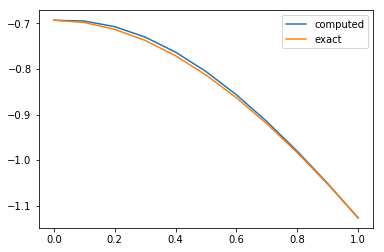

In [219]:
plt.plot(pde1.s_space, pde1.s_val, label = 'computed')

exact_val = pde1.exact_sol(pde1.s_space)
plt.plot(pde1.s_space, exact_val, label = 'exact')
plt.legend()

print('>>>iteration error is ' + str(err))
print('>>>iter number is ' + str(n_iter))
print('>>>max norm of error is ' + str(np.max(np.abs(pde1.s_val-exact_val))))